c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


                         precision    recall  f1-score   support

All-or-nothing thinking       0.00      0.00      0.00        15
    Emotional Reasoning       0.22      0.17      0.19        30
        Fortune-telling       0.32      0.33      0.33        24
               Labeling       0.13      0.07      0.10        40
          Magnification       0.15      0.14      0.14        37
          Mental filter       0.13      0.23      0.17        13
           Mind Reading       0.41      0.52      0.46        54
     Overgeneralization       0.24      0.32      0.27        50
        Personalization       0.23      0.18      0.20        39
      Should statements       0.06      0.06      0.06        18

               accuracy                           0.24       320
              macro avg       0.19      0.20      0.19       320
           weighted avg       0.22      0.24      0.22       320



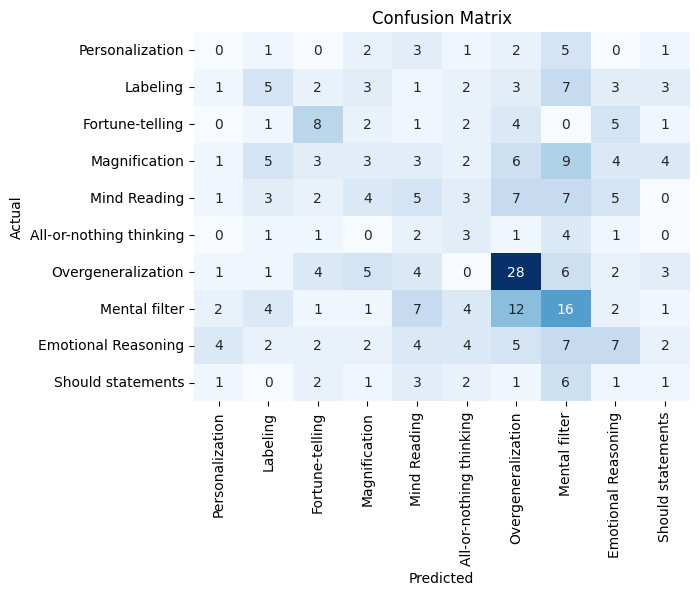

In [2]:
# This file is intended to implement Class Weighting and Hyperparameter Optimization for the best performing model found in the baseline.ipynb notebook, LinearSVC with TF-IDF Vectorization.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Load the data
data = pd.read_csv('Annotated_data.csv')
discreteData = data[['Id_Number', 'Patient Question', 'Dominant Distortion']].copy()
discreteData.loc[discreteData['Dominant Distortion'] != 'No Distortion', 'Dominant Distortion'] = 'Distorted'

# Create a new dataframe with only the distorted questions
distortedData = data[data['Dominant Distortion'] != 'No Distortion'].copy()

labels = distortedData['Dominant Distortion'].unique()

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(discreteData['Patient Question'], discreteData['Dominant Distortion'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(distortedData['Patient Question'], distortedData['Dominant Distortion'], test_size=0.2, random_state=42)

# Vectorize the data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Fit the model as a baseline
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


                         precision    recall  f1-score   support

All-or-nothing thinking       0.06      0.07      0.06        15
    Emotional Reasoning       0.19      0.17      0.18        30
        Fortune-telling       0.30      0.38      0.33        24
               Labeling       0.13      0.10      0.11        40
          Magnification       0.19      0.14      0.16        37
          Mental filter       0.10      0.23      0.14        13
           Mind Reading       0.41      0.48      0.44        54
     Overgeneralization       0.28      0.24      0.26        50
        Personalization       0.25      0.21      0.23        39
      Should statements       0.04      0.06      0.05        18

               accuracy                           0.23       320
              macro avg       0.20      0.21      0.20       320
           weighted avg       0.23      0.23      0.23       320



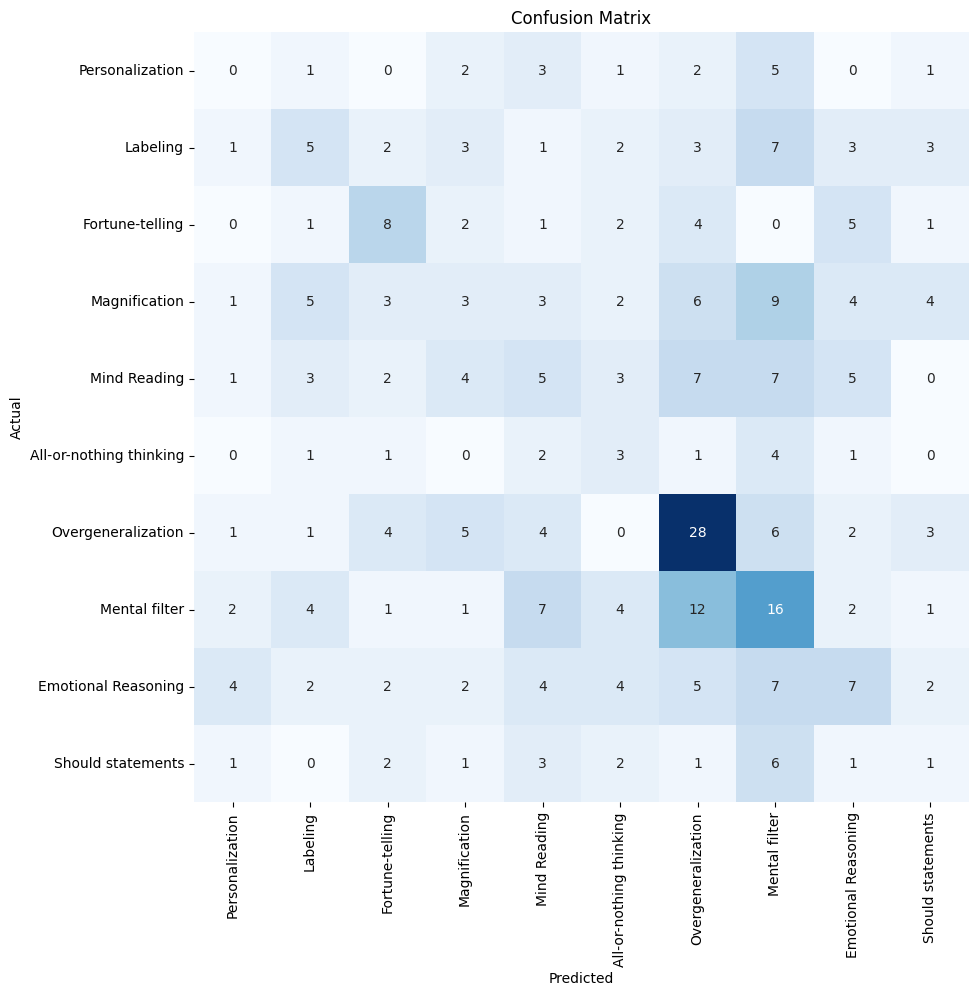

In [3]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))

# Create the model
model = LinearSVC(class_weight=class_weights)

# Fit the model
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

{'C': 1, 'class_weight': None, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l2'}
LinearSVC(C=1)
0.213765318627451
5
5
0.08751583099365234
{'mean_fit_time': array([3.00006866e-03, 1.75298071e-01, 1.58832898e+00, 1.37041178e+00,
       2.19979286e-03, 6.71456814e-02, 1.70861459e+00, 1.70131512e+00,
       3.20467949e-03, 1.91954613e-01, 2.13921299e+00, 2.12123542e+00,
       1.99842453e-03, 7.22301006e-02, 2.54445944e+00, 2.23445725e+00,
       2.19335556e-03, 4.72287798e-01, 3.50975356e+00, 3.27941775e+00,
       1.39307976e-03, 2.38859940e-01, 3.07448125e+00, 2.98482795e+00,
       2.12049484e-03, 4.29481745e-01, 3.40161324e+00, 3.30482645e+00,
       2.20589638e-03, 2.34688568e-01, 3.58493495e+00, 3.37897673e+00]), 'std_fit_time': array([6.31731989e-04, 7.75489800e-02, 1.67569767e+00, 1.33908048e+00,
       3.99399572e-04, 1.64187875e-03, 1.60723159e+00, 1.78781318e+00,
       3.97746409e-04, 5.11979031e-02, 1.58727688e+00, 1.52584577e+00,
       2.34572866e-06, 3.003847

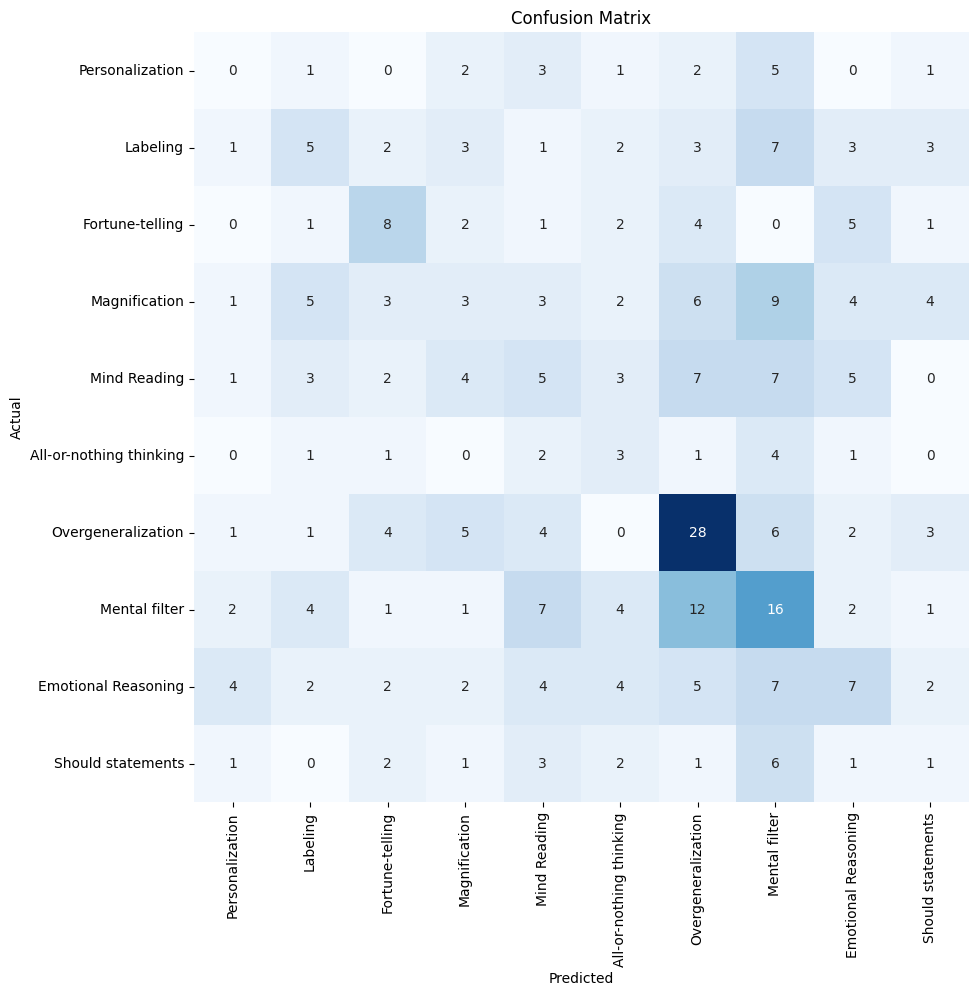

In [5]:

# Hyperparameter Optimization using grid search
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
# Define the parameter grid
param_grid = {'penalty': ['l1', 'l2'], 'C':[1, 10], 'class_weight': [None, 'balanced'], 'loss': ['hinge', 'squared_hinge'], 'multi_class': ['ovr', 'crammer_singer']}

# Create the model
model = LinearSVC(class_weight=class_weights)

# Create the grid search object
grid = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the data
grid.fit(X_train, y_train)

# Print the best parameters
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_index_)
print(grid.scorer_)
print(grid.n_splits_)
print(grid.refit_time_)
print(grid.cv_results_)

# Predict the test set
y_pred = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
AdaBoostClassifier(algorithm='SAMME')
0.3754305579441318
9
5
1.2203989028930664
{'iter': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]), 'n_resources': array([ 674,  674,  674,  674,  674,  674,  674,  674, 2022, 2022, 2022]), 'mean_fit_time': array([0.95553226, 1.93631768, 0.95858521, 1.89662623, 1.12458229,
       1.93667221, 0.96584482, 2.01421456, 3.85130792, 1.80001078,
       3.56378512]), 'std_fit_time': array([0.01460949, 0.02329414, 0.02176697, 0.02046869, 0.07696368,
       0.05061633, 0.03577065, 0.12479501, 0.17294956, 0.06651891,
       0.04697357]), 'mean_score_time': array([0.01273775, 0.02462072, 0.01260133, 0.0236958 , 0.01693554,
       0.02493715, 0.01279497, 0.02553244, 0.04530621, 0.02021346,
       0.03790712]), 'std_score_time': array([0.0003929 , 0.00166652, 0.00079862, 0.00059137, 0.00139111,
       0.00038676, 0.00039758, 0.00139725, 0.00462636, 0.00040935,
       0.00058641]), 'param_algorithm': maske

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

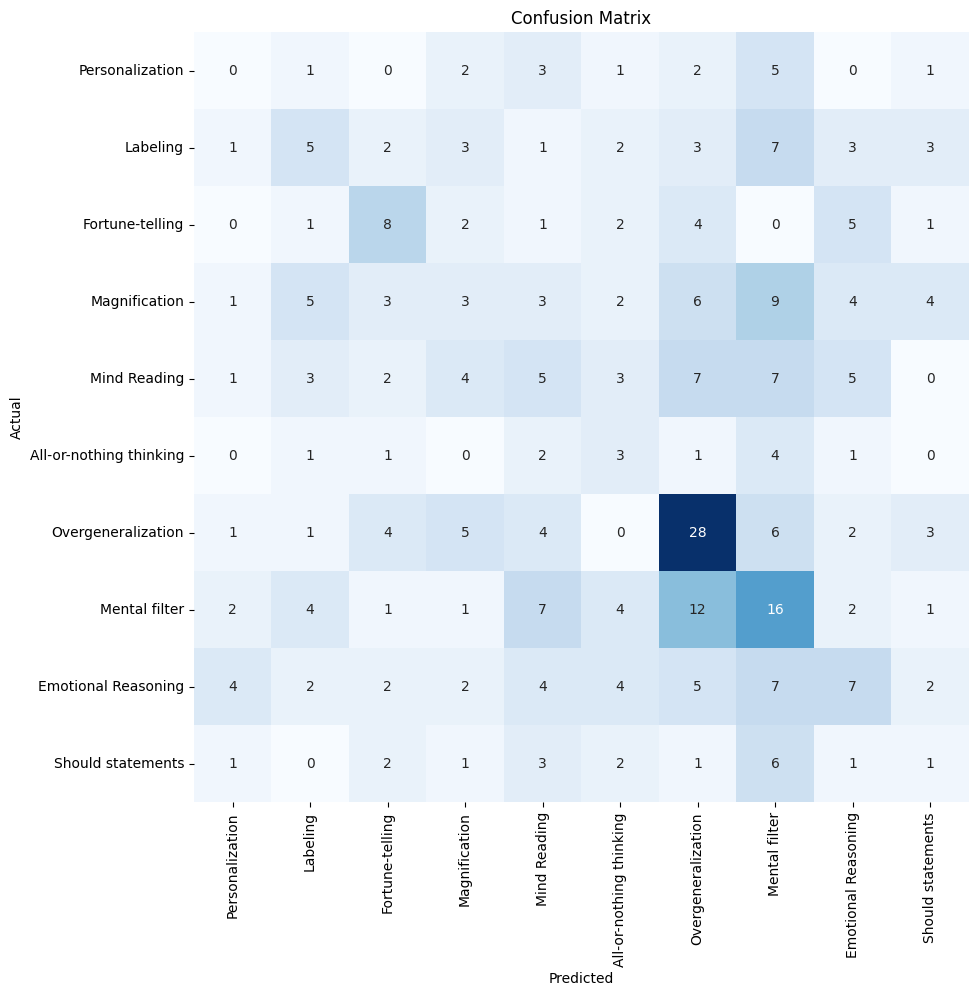

In [7]:
# Hyperparameter Optimization using halving search for adaboost classifier with count vectorizer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Patient Question'], data['Dominant Distortion'], test_size=0.2, random_state=42)

# Vectorize the data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Define the parameter grid
param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.1, 1.0], 'algorithm': ['SAMME', 'SAMME.R']}

# Create the model
model = AdaBoostClassifier()

# Create the halving grid search object
halving_grid = HalvingGridSearchCV(model, param_grid, cv=5)

# Fit the halving grid search object to the data
halving_grid.fit(X_train, y_train)

# Print the best parameters
print(halving_grid.best_params_)
print(halving_grid.best_estimator_)
print(halving_grid.best_score_)
print(halving_grid.best_index_)
print(halving_grid.scorer_)
print(halving_grid.n_splits_)
print(halving_grid.refit_time_)
print(halving_grid.cv_results_)

# Predict the test set
y_pred = halving_grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()